# Задание
https://docs.google.com/document/d/1snU4dXicuPmFz9XjTF8c7nSw0qGdJAgdJeZVrg-NakI/edit

## Продвинутое машинное обучение: ДЗ 1

Первое ДЗ состоит из двух частей: первая часть про теорему Байеса и общие вероятностные рассуждения, вторая часть — про линейную регрессию. В качестве решения ожидается ссылка на jupyter-ноутбук на вашем github (или публичный, или с доступом для пользователя snikolenko). Решение обязательно нужно сдать на портале Академии.

## Часть I: О теореме Байеса

Первая часть состоит из двух вопросов и одного задания. Смысл её в том, чтобы провести вероятностные рассуждения в ситуациях, когда модель сама по себе очень простая, но её ещё надо правильно построить, правильно отобразить жизненную ситуацию. Поэтому на первые два вопроса рекомендую давать развёрнутые ответы; эти ответы лучше писать прямо в ноутбуке, LaTeX в jupyter работает на вполне достаточном для нас уровне.

1. Произошло убийство. На месте убийства найдена кровь, которая явно (будем считать, что с вероятностью 1) принадлежит настоящему убийце. Кровь принадлежит редкой группе, которая присутствует всего лишь у 1% населения. И так получилось, что у подсудимого как раз эта редкая группа крови! Первым выходит прокурор и говорит: “Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; значит, с вероятностью 99% он виновен, предлагаю осудить”. В чём не прав прокурор? Укажите, какие вероятности он оценил, а какие должен был оценить.

2. Затем выходит адвокат, объясняет ошибки прокурора и берёт слово сам: “В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела”. В чём не прав адвокат? Какие вероятности он оценил, а какие должен был оценить.

3. Вернёмся к тесту на страшную болезнь из первой лекции. Напомню, что по предположениям задачи болеет 1% населения, а тест имеет вероятность ошибки 5% в обе стороны. Мы видели, что в результате человек с положительным тестом имеет апостериорную вероятность оказаться больным всего лишь около 16%. Врачи решили, что терпеть это никак нельзя; они готовы провести срочное исследование и улучшить качество теста. Но сил и денег хватит только для того, чтобы сократить один тип ошибок, т.е. уменьшить или только число false positives (когда тест выдаёт положительный результат у здорового человека), или только число false negatives (когда тест выдаёт отрицательный результат у больного). Помогите медикам: постройте зависимости апостериорной вероятности болезни после положительного и отрицательного теста от обоих видов ошибок (например, в виде графиков), сделайте выводы и дайте рекомендации врачам -- на чём лучше сосредоточиться?

### Ответы

#### 1 - 2
Введём следующие обозначения:
$s$ - группа крови: $s = 1$ - человек обладает редкой группой крови, $s = 0$ - человек не обладает редкой группой крови,
$d$ - является ли человек убийцей: $d = 1$ - этот человек убийца, $d = 0$ - этот человек не убийца.
Тогда $p(s=1|d=1)$ - вероятность того, что если этот человек убийца, то у него эта редкая группа крови, $p(d=1|s=1)$ - вероятность того, что если у человека редкая группа крови, то он убийца. Исходя из условий задачи, $p(s=1) = 1\%$.

Чтобы ответить на вопрос, с какой вероятностью подсудимый является виновным, нужно оценить вероятность $p(d=1|s=1)$.

##### 1
Теперь обсудим ответ прокурора. В своей первой фразе

> Шанс, что у подсудимого была бы именно такая группа крови, если бы он был невиновен -- всего 1%; 

прокурор говорит о вероятности $p(s=1|d=0)$, но приводит оценку для $p(s=1)=1\%$. Во второй фразе он делает вывод:

> с вероятностью 99% он виновен, предлагаю осудить.

Здесь подразумевается вероятность виновности подозреваемого при наличии редкой группы крови: $p(d=1|s=1)$ (искомая вероятность), но приводится вероятность для случайного человека не обладать этой редкой группой крови $p(s=0)=99\%$. 

##### 2
Теперь обсудим слова адвоката. В первой фразе он приводит оценку для количества человек, которые живут в городе и при этом обладают этой редкой группой крови: $p(s=1)=1\%$ 
> В городе живёт миллион человек. Это значит, что примерно у 10000 из них такая группа крови. 

Здесь всё верно (10_000 человек - это 1% от 1_000_000). В своей второй фразе адвокат говорит:
> Значит, всё, что говорит нам эта кровь -- это то, что подсудимый совершил убийство с вероятностью 0.01%. 

Здесь адвокат приводит оценку для некоторой вероятности в $0.01\%$. Как я понял, эта оценка получена оценкой вероятности того, что если человек обладает редкой группой крови, то он убийца (т.е. просто какой-то выделенный 1 человек из этой группы в 10_000 человек) $p(d=1|s=1) = 0.01\%$. То есть адвокат приводит здесь оценку для той самой искомой вероятности. И в третьей фразе адвокат наносит "сокрушительный" удар по стороне обвинения:
> Получается, что это свидетельство не просто не является строгим доказательством, а и вовсе даёт нам ничтожно малую вероятность того, что мой подзащитный виновен, так что предлагаю исключить его из материалов дела.

Здесь адвокат предлагает полностью исключить из рассмотрения дела тот факт, что у подсудимого та же редкая группа крови, что и была найдена на месте преступления. Но этого делать нельзя: если её исключить, то, при отсутствии других свидетельств, нужно будет оценивать вероятность $p(d=1) = 10^{-6}$ (вероятность того, что произвольный человек из 1_000_000 жителей города является убийцей), которая на 2 порядка ниже, чем вероятность, учитывающая, что $p(d=1|s=1) = 10^{-4}$. Видно, что вероятность, о которой говорит адвокат $p(d=1)$, будет меньше искомой $p(d=1|s=1)$, что говорит о том, что адвокат пытается заставить суд учитывать меньше доказательств, тем самым отведя подозрения от своего подзащитного, снизив вероятность того, что преступление совершил именно он. В этом смысле он делает свою работу, защищая клиента. 

#### 3

Введём обозначения длля задачи. Пусть $s$ означает, болеет ли человек: если $s=1$, то болеет, если $s=0$, то здоров; $d$ ответственна за результат теста: при $d=1$ тест положительный, при $d=0$ -- отрицательный. Обозначии ошибку False Positive как $$p(d=1|s=0) = \beta,$$ а False Negative как $$p(d=0|s=1)=\alpha.$$ Также обозначим искомые апостериорные вероятности болезни после положительного и отрицательного тестов как $$p(s=1|d=1)=F, \qquad p(s=1|d=0)=G.$$ По условиям задачи, эпидемиологическая обстановка не изменилась, т.е. $p(s=1)=0.01$ и $p(s=0) = 0.99$.

Запишем ещё пару условий. Сумма условных вероятностей при положительном тесте человеку быть здоровым или больным равна 1: $p(s=1|d=1) + p(s=0|d=1) = 1$, т.е. $p(s=0|d=1) = 1 - F$. Аналогично для случая отрицательного теста: $p(s=1|d=0) + p(s=0|d=0) = 1$, т.е. $p(s=0|d=0) = 1 - G$. То же самое можно записать и для фиксированного состояние человека при различных исходах теста: человек будет либо здоровым, либо больным как при положительном, так и при отрицательном исходах теста: $p(d=1|s=1) = 1 - \alpha$, $p(d=0|s=0) = 1 - \beta$. 

Опустив выкладки, получим, что выражения для зависимостей $F$ и $G$ от $\alpha$ и $\beta$ запишутся в следующем виде:
$$F = \frac{(1-\alpha) \cdot p(s=1)}{(1-\alpha) \cdot p(s=1) + \beta \cdot p(s=0)},$$
$$G = \frac{\alpha \cdot p(s=1)}{(1-\beta) \cdot p(s=0) + \alpha \cdot p(s=1)}.$$

In [178]:
from datetime import datetime, timedelta

from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd
import scipy as sp
import scipy.stats as st
import scipy.integrate as integrate

In [219]:
PS_1 = 0.01
PS_0 = 0.99

def func_F(alpha=0.05, beta=0.05):
    numer = (1 - alpha) * PS_1
    denom = (1 - alpha) * PS_1 + beta * PS_0
    return numer / denom

def func_G(alpha=0.05, beta=0.05):
    numer = alpha * PS_1
    denom = (1 - beta) * PS_0 + alpha * PS_1
    return numer / denom

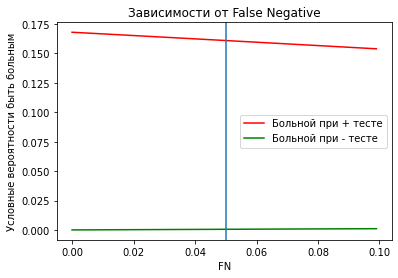

In [220]:
alpha_ = np.arange(0, 0.1, 0.001)

plt.plot(alpha_, func_F(alpha=alpha_), 'r', label='Больной при + тесте')
plt.plot(alpha_, func_G(alpha=alpha_), 'g', label='Больной при - тесте')
plt.axvline(0.05)
plt.title('Зависимости от False Negative')
plt.xlabel('FN')
plt.ylabel('Условные вероятности быть больным')
plt.legend()
plt.show()

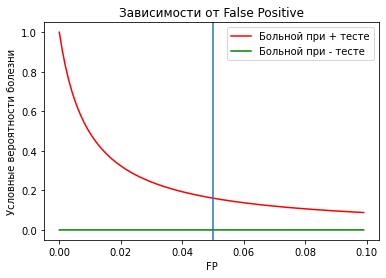

In [221]:
beta_ = np.arange(0, 0.1, 0.001)

plt.plot(beta_, func_F(beta=beta_), 'r', label='Больной при + тесте')
plt.plot(beta_, func_G(beta=beta_), 'g', label='Больной при - тесте')
plt.axvline(0.05)
plt.title('Зависимости от False Positive')
plt.xlabel('FP')
plt.ylabel('Условные вероятности болезни')
plt.legend()
plt.show()

##### Вывод

Как видно из графиков, уменьшение ошибки FN лишь незначительно увеличит вероятность обнаружить больного при + тесте и незначительно снизит вероятность быть больным при - тесте. Уменьшение FP незначительно скажется на вероятности быть больным при - тесте. А вот уменьшение ошибки FP хотя бы до 2% позволит увеличить вероятность быть больным при + тесте в 2 раза, то есть примерно до 32% быть больным при + тесте. Уменьшение же её до 1% позволит говорить о 48%. 

In [226]:
print(f'{func_F(beta=0.02) / func_F(beta=0.05):.2f}, {func_F(beta=0.02):.2f}, '
      f'{func_F(beta=0.01) / func_F(beta=0.05):.2f}, {func_F(beta=0.01):.2f}')

2.01, 0.32, 3.04, 0.49


## Часть II: О линейной регрессии

Эта часть первого домашнего задания связана с анализом конкретного датасета. Датасет давайте возьмём довольно релевантный реальной жизни; он доступен по следующей ссылке:

https://ourworldindata.org/coronavirus-source-data

1. Скачайте данные в формате csv, выберите из таблицы данные по России, начиная с 3 марта 2020 г. (в этот момент впервые стало больше 2 заболевших). В качестве целевой переменной возьмём число случаев заболевания (столбцы total_cases и new_cases); для упрощения обработки можно заменить в столбце new_cases все нули на единицы. Для единообразия давайте зафиксируем тренировочный набор в виде первых 50 отсчётов (дней), начиная с 3 марта; остальные данные можно использовать в качестве тестового набора (и он даже будет увеличиваться по мере выполнения задания). Иначе говоря, мы будем “играть” за российские власти, которые пытаются понять, что делать, глядя на данные об эпидемии в мае 2020 года.

2. Постройте графики целевых переменных. Вы увидите, что число заболевших растёт очень быстро, на первый взгляд экспоненциально. Для первого подхода к снаряду давайте это и используем.

a. Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

b. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

c. Посэмплируйте много разных экспонент, постройте графики. Сколько, исходя из этих сэмплов, предсказывается случаев коронавируса в России к 1 мая 2020 года? к 1 июня? к 1 сентября? Постройте предсказательные распределения (можно эмпирически, исходя из данных сэмплирования).

3. Предсказания экспоненциальной модели наверняка получились грустными. Но это, конечно, чересчур пессимистично — экспоненциальный рост в природе никак не может продолжаться вечно. Кривая общего числа заболевших во время эпидемии в реальности имеет сигмоидальный вид: после начальной фазы экспоненциального роста неизбежно происходит насыщение. В качестве конкретной формы такой сигмоиды давайте возьмём форму функции распределения для гауссиана:


Естественно, в нашем случае сигмоида стремится не к единице, т.е. константа перед интегралом может быть произвольной (и её можно внести в экспоненту), а в экспоненте под интегралом может быть произвольная квадратичная функция от t.

a. Предложите способ обучать параметры такой сигмоидальной функции при помощи линейной регрессии.

b. Обучите эти параметры на датасете случаев коронавируса в России. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели.

c. Посэмплируйте много разных сигмоид из апостериорного распределения, постройте графики. Сколько, исходя из этих сэмплов, будет всего случаев коронавируса в России? Постройте эмпирическое предсказательное распределение, нарисуйте графики. Каков ваш прогноз числа случаев коронавируса в пессимистичном сценарии (90-й процентиль в выборке числа случаев)? В оптимистичном сценарии (10-й процентиль)?

4. Бонус: проведите такой же анализ для других стран (здесь придётся руками подобрать дни начала моделирования — коронавирус приходил в разные страны в разное время). Насколько разные параметры получаются? Можно ли разделить страны на кластеры (хотя бы чисто визуально) в зависимости от этих параметров?

5. [Эта часть задания не оценивается, здесь нет правильных и неправильных ответов, но буду рад узнать, что вы думаете]
Что вы поняли из этого упражнения? Что можно сказать про коронавирус по итогам такого моделирования? Как принять решение, например, о том, нужно ли вводить карантин?



## 1

In [104]:
all_data = pd.read_csv('covid_data.csv', parse_dates=['date'])
print(all_data.shape)
# all_data.head()

(70444, 59)


In [105]:
DATE_3_MARCH = datetime(2020, 3, 3) 
LAST_DATE = DATE_3_MARCH + timedelta(days=50)

russian_data = all_data[all_data['location'] == 'Russia']
russian_data = russian_data[russian_data['date'] >= DATE_3_MARCH]
russian_data = russian_data[russian_data['date'] <= LAST_DATE]
print(russian_data.shape)
# russian_data.head()

(51, 59)


In [106]:
russian_data['new_cases'] = russian_data['new_cases'].apply(lambda x: 1 if x == 0 else x)
russian_data['date'] = russian_data['date'].apply(lambda x: ((x - DATE_3_MARCH)/timedelta(1)))
russian_data['date'] = russian_data['date'].astype(int)
# russian_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
52137,RUS,Europe,Russia,0,3.0,1.0,0.143,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52138,RUS,Europe,Russia,1,3.0,1.0,0.143,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52139,RUS,Europe,Russia,2,4.0,1.0,0.286,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52140,RUS,Europe,Russia,3,13.0,9.0,1.571,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824
52141,RUS,Europe,Russia,4,13.0,1.0,1.571,NaN,NaN,0.0,...,24765.954,0.1,431.297,6.18,23.4,58.3,NaN,8.05,72.58,0.824


## 2

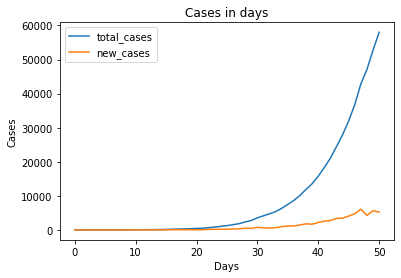

In [145]:
TARGET_VARS = ['total_cases', 'new_cases']

for target in TARGET_VARS:
    plt.plot(russian_data['date'], russian_data[target], label=target)
plt.title('Cases in days')
plt.xlabel('Days')
plt.ylabel('Cases')
plt.legend()
plt.show()

In [124]:
linreg_total = LinearRegression()
linreg_total.fit(np.array(russian_data['date']).reshape(-1, 1), np.log(russian_data['total_cases']))

linreg_new = LinearRegression()
linreg_new.fit(np.array(russian_data['date']).reshape(-1, 1), np.log(russian_data['new_cases']))
coefs = [linreg_total.coef_, linreg_new.coef_]
inters = [linreg_total.intercept_, linreg_new.intercept_]

### 2а. Используя линейную регрессию, обучите модель с экспоненциальным ростом числа заболевших: y ~ exp(линейная функция от x), где x — номер текущего дня.

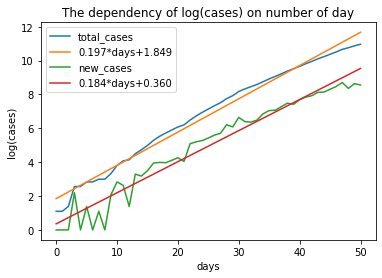

In [144]:
for i, target in enumerate(TARGET_VARS):
    plt.plot(russian_data['date'], np.log(russian_data[target]), label=target)
    plt.plot(russian_data['date'], coefs[i]*russian_data['date']+inters[i], label=f'{coefs[i][0]:.3f}*days+{inters[i]:.3f}')
plt.title('The dependency of log(cases) on number of day')
plt.xlabel('days')
plt.ylabel('log(cases)')
plt.legend()
plt.show()

### 2b. Найдите апостериорное распределение параметров этой модели для достаточно широкого априорного распределения. Требующееся для этого значение дисперсии шума в данных оцените, исходя из вашей же максимальной апостериорной модели (это фактически первый шаг эмпирического Байеса).

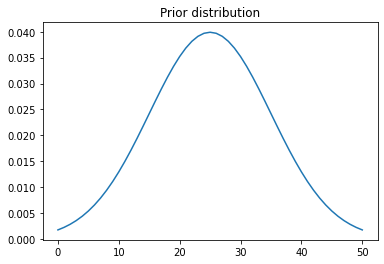

In [177]:
prior_params = {'loc': 25, 'scale': 10}

# Априорное распределение
prior = st.norm(**prior_params).pdf
y_prior = [prior(day) for day in russian_data['date']]
plt.plot(russian_data['date'], y_prior)
plt.title('Prior distribution')
plt.show()

In [172]:
# Правдоподобие
